In [14]:
#%pip install underthesea
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import underthesea

# Load your dataframe
df = pd.read_csv("data_vtv24.csv", encoding = 'utf-8')

In [16]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
filtered_df = df[df['published_date'] >= '2023-08-01']
filtered_df

,video_id,published_date,video_title,video_description,likes,views
8,nRa-3AEpKWg,2024-06-02 13:59:11+00:00,Thời sự toàn cảnh tối 2/6: Thu phí ô tô vào nộ...,Thời sự toàn cảnh tối 2/6 có các nội dung:\n00...,312,88227
10,-GPRnfIb1pc,2023-10-13 04:00:00+00:00,"Làm sao để vấn nạn lạm thu học phí không ""đến ...","Mới chỉ bắt đầu năm học mới khoảng 1 tháng, nh...",250,31420
11,r05t9chGLHU,2024-08-24 13:30:22+00:00,Đa dạng các hoạt động “Những ngày Hà Nội tại T...,"Tại Phố đi bộ Nguyễn Huệ (Quận 1, TP.HCM), UBN...",62,6167
15,j276US6vqJk,2023-11-22 02:49:21+00:00,Thế giới toàn cảnh 22/11: Thế giới trước nguy ...,Những nội dung chính sẽ có trong Thế giới toàn...,168,25083
19,_ktCEZEI9aY,2023-12-29 01:00:19+00:00,Để thu phí sử dụng vỉa hè hiệu quả: Cần công k...,"Theo các chuyên gia, muốn chủ trương thu phí s...",77,9020
...,...,...,...,...,...,...
23022,lHnUMkc3LCo,2023-10-01 14:00:07+00:00,"Thời sự toàn cảnh tối 1/10: Vụ học sinh quỳ, k...",Những nội dung sẽ có trong bản tin Thời sự toà...,996,289912
23025,IsvzvV7ev60,2024-04-03 16:00:16+00:00,Mã độc tống tiền gây thiệt hại nặng nề | VTV24,Mã độc tống tiền được đánh giá là một trong nh...,148,15341
23038,syFXswGvrAo,2024-09-03 09:45:02+00:00,"Những thầy cô giáo vượt ngàn chông gai, quyết ...",Các thầy cô là một lát cắt trong hàng nghìn cu...,71,5656
23046,bPqv8wf_x8Y,2023-09-26 04:00:28+00:00,Ấm áp lớp học tình thương của anh bảo vệ dân p...,"Suốt 13 năm qua, đều đặn từ 18h đến 20h30 thứ ...",118,6345


In [25]:
filtered_df.to_csv('filtered_data_vtv24.csv')

In [17]:
# Analyze published_date
df['published_date'] = pd.to_datetime(df['published_date'])
df['publish_year'] = df['published_date'].dt.year
df = df[df['publish_year'] >= 2017]
df['publish_month'] = df['published_date'].dt.month

In [18]:
# Analyze video_title
df['title_length'] = df['video_title'].str.len()

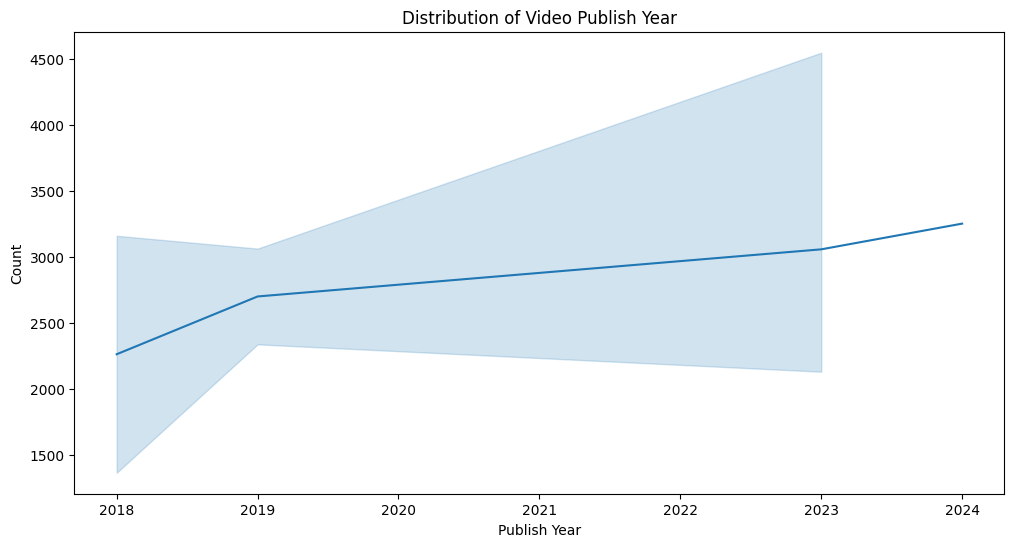

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['publish_year'], y=df['publish_year'].value_counts().sort_index())
plt.title('Distribution of Video Publish Year')
plt.xlabel('Publish Year')
plt.ylabel('Count')
plt.show()

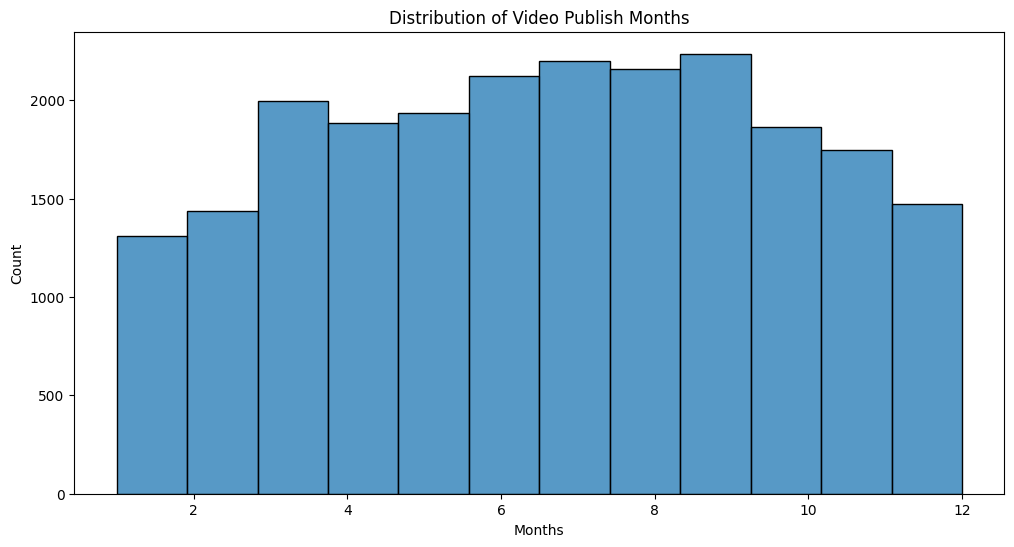

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(df['publish_month'], bins = 12)
plt.title('Distribution of Video Publish Months')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

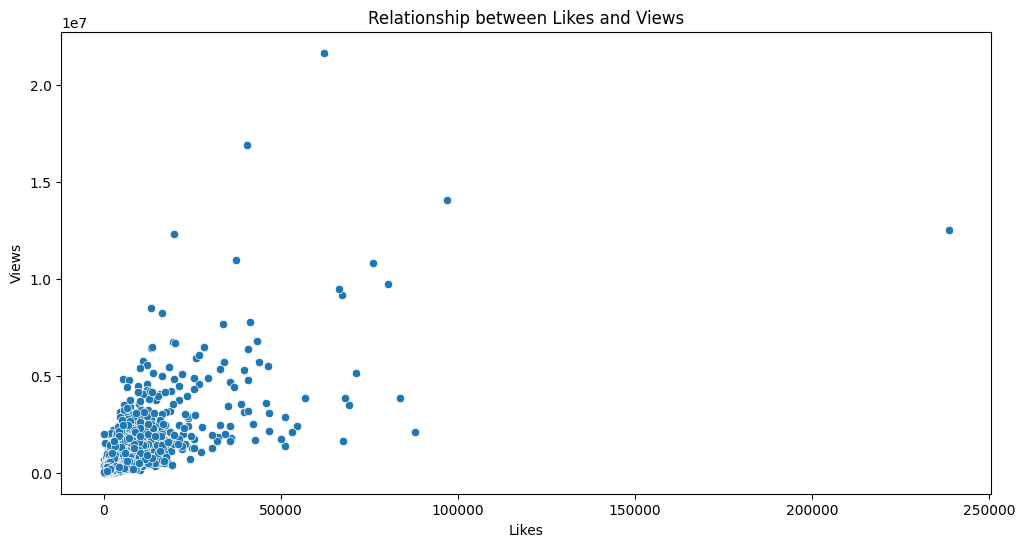

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['likes'], y=df['views'])
plt.title('Relationship between Likes and Views')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.show()

In [22]:
# Correlation analysis
correlation = df[['likes', 'views', 'title_length']].corr()
print(correlation)

                 likes     views  title_length
likes         1.000000  0.749130     -0.014143
views         0.749130  1.000000      0.051538
title_length -0.014143  0.051538      1.000000


In [23]:
# Additional analysis (example: most liked videos)
most_liked_videos = df.nlargest(10, 'likes')
most_liked_videos.sort_values(by='likes', ascending=False)

,video_id,published_date,video_title,video_description,likes,views,publish_year,publish_month,title_length
20462,SG3C6p0fvgQ,2023-09-07 03:05:14+00:00,"Máy bay rơi khi đang trình diễn ở bữa tiệc, ph...",Tiệc tiết lộ giới tính của thai nhi là một tro...,238667,12513149,2023,9,71
4508,EnfTIrLZzJM,2020-07-06 12:41:23+00:00,Jonathan Galindo - Trò đùa chết người mới sau ...,Thực hiện thử thách hay cả gia đình bị ám sát?...,96960,14090750,2020,7,67
7834,I237oOOZ9rk,2020-07-12 03:15:39+00:00,"Gặp gỡ BTV ""MẶN"" nhất VTV | VTV24","BTV Việt Hoàng hay ""Anh da nâu"" của VTV Digita...",88030,2114503,2020,7,33
20666,YZl2LmGEbYY,2019-12-23 13:30:10+00:00,NHÌN LẠI 2019 | VTV24,"Trump - Kim gặp nhau ở Hà Nội, 39 người Việt t...",83681,3841145,2019,12,21
19062,dllkni-2dh0,2023-08-03 13:19:36+00:00,Máy bay lao xuống đường đông người rồi bốc chá...,#shorts #vtvdigital #vtv24 \n----------\nĐồn...,80167,9744973,2023,8,55
1192,UjkavnKvnhw,2019-01-31 08:53:17+00:00,"Tổng hợp những câu nói cực ""thấm"" trong Táo Qu...","Điểm qua một số câu nói cực ""thấm"" trong Táo q...",76107,10823924,2019,1,61
12082,fSJ9yw7yVBQ,2023-03-17 03:23:54+00:00,Cận cảnh buổi diễn tập khắc nghiệt của lực lượ...,Cận cảnh buổi diễn tập khắc nghiệt của lực lượ...,71206,5129144,2023,3,97
3702,m8fizDQTbYY,2019-11-04 10:00:14+00:00,1977 Vlog - Chuyển động 24h Parody - Phiên bản...,1977 Vlog phiên bản nghiêm túc khác gì 1977 Vl...,69402,3486969,2019,11,65
4514,xkwypBumRtg,2020-07-04 06:00:10+00:00,Điểm Tuần: IQ VÔ CỰC | VTV24,Quý vị có biết IQ của mình là bao nhiêu không?...,68110,3836866,2020,7,28
22383,nIE-CycFToI,2021-12-22 15:00:09+00:00,NHÌN LẠI 2021 | VTV24,2021 khiến chúng ta nhận ra những gì? Cùng NHÌ...,67601,1617561,2021,12,21


In [24]:
def extract_keywords(text):
  # Tokenize the text using underthesea
  tokens = underthesea.word_tokenize(text)

  # Remove stop words
  stop_words = open("vietnamese-stopwords.txt", "r", encoding="utf-8").read().split("\n") + list(r'\/:*?"<>|-_,')
  filtered_tokens = [word for word in tokens if word not in stop_words]

  return filtered_tokens

all_keywords = []
for index, row in df.iterrows():
  keywords = extract_keywords(row['video_title'])
  all_keywords.extend(keywords)

keyword_counts = Counter(all_keywords)
most_frequent_keywords = keyword_counts.most_common(10)
print("Most frequent keywords:", most_frequent_keywords)

Most frequent keywords: [('VTV24', 19639), ('Tin Tức', 3081), ('? |', 1989), ('Việt Nam', 1426), ('| VTV24', 1340), ('toàn cảnh', 1038), ('Thời sự', 839), ('Hà Nội', 811), ('Mỹ', 782), ('2020', 666)]
